In [54]:
# Import necessary libraries
from sklearn import datasets # to retrieve the iris Dataset
import numpy as np
import pandas as pd # to load the dataframe
from sklearn.preprocessing import StandardScaler # to standardize the features
from sklearn.decomposition import PCA # to apply PCA
import seaborn as sns # to plot the heat maps
import matplotlib.pyplot as plt
from JPM_Functions import outlier_removal, my_mae, my_mse, my_r2, my_train_test_split, my_performance
from jpm_gradient_boosted_tree_classes import DecisionTree, GradientBoostAll
from sklearn.model_selection import train_test_split

In [64]:
#Upload data in dataframe
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', sep = '\s+', header = None, names = column_names) 
df.head()


#    print(best_params)

# Remove Outliers
df = outlier_removal(df, "MEDV")
print(df.info())
df.reset_index(drop=True)

# Split into X and y
df_x = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]
df_y = df['MEDV']
df_x.reset_index(drop=True)
df_y.reset_index(drop=True)

# Standardize Data (Very important for PCA) 
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_x))
print(df_scaled)
df_scaled.reset_index(drop=True)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\EmmaBland\AppData\Local\Temp\ipykernel_27360\3624111132.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('housing.csv', sep = '\s+', header = None, names = column_names)


<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     466 non-null    float64
 1   ZN       466 non-null    float64
 2   INDUS    466 non-null    float64
 3   CHAS     466 non-null    int64  
 4   NOX      466 non-null    float64
 5   RM       466 non-null    float64
 6   AGE      466 non-null    float64
 7   DIS      466 non-null    float64
 8   RAD      466 non-null    int64  
 9   TAX      466 non-null    float64
 10  PTRATIO  466 non-null    float64
 11  B        466 non-null    float64
 12  LSTAT    466 non-null    float64
 13  MEDV     466 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 54.6 KB
None
           0         1         2         3         4         5         6   \
0   -0.435149  0.334919 -1.336816 -0.252838 -0.160527  0.686751 -0.123732   
1   -0.432601 -0.477604 -0.635435 -0.252838 -0.748894  0.419254  0.365267   
2   

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.435149,0.334919,-1.336816,-0.252838,-0.160527,0.686751,-0.123732,0.120801,-0.987089,-0.695549,-1.609553,-1.197647
1,-0.432601,-0.477604,-0.635435,-0.252838,-0.748894,0.419254,0.365267,0.534016,-0.873232,-1.016283,-0.396584,-0.597069
2,-0.432603,-0.477604,-0.635435,-0.252838,-0.748894,1.746319,-0.270075,0.534016,-0.873232,-1.016283,-0.396584,-1.334799
3,-0.431986,-0.477604,-1.355972,-0.252838,-0.842692,1.421500,-0.816183,1.049935,-0.759375,-1.135074,0.040085,-1.492162
4,-0.427533,-0.477604,-1.355972,-0.252838,-0.842692,1.680313,-0.516359,1.049935,-0.759375,-1.135074,0.040085,-1.147118
...,...,...,...,...,...,...,...,...,...,...,...,...
461,-0.428312,-0.477604,0.080681,-0.252838,0.137921,0.718017,0.015472,-0.638356,-0.987089,-0.832158,1.156017,-0.520553
462,-0.430420,-0.477604,0.080681,-0.252838,0.137921,-0.103582,0.286742,-0.728386,-0.987089,-0.832158,1.156017,-0.605731
463,-0.428539,-0.477604,0.080681,-0.252838,0.137921,1.383286,0.797157,-0.784920,-0.987089,-0.832158,1.156017,-1.102363
464,-0.422610,-0.477604,0.080681,-0.252838,0.137921,1.067153,0.736478,-0.680615,-0.987089,-0.832158,1.156017,-0.981092


In [65]:
# Perform PCA
pca = PCA(n_components=3) # Init model
pca.fit(df_scaled) # Fit to model
pca_data = pca.transform(df_scaled) # Transform data
pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3']) # Put into DataFrame
pca_data.head()

,PC1,PC2,PC3
0,-2.195742,-0.673019,0.618541
1,-1.504879,-0.715335,-0.336655
2,-2.196014,-0.310891,0.646827
3,-2.745419,0.131020,0.237685
4,-2.583865,0.070160,0.329458


In [69]:
# Perform PCA
pca = PCA(n_components=2) # Init model
pca.fit(df_scaled) # Fit to model
pca_data = pca.transform(df_scaled) # Transform data
pca_data = pd.DataFrame(pca_data, columns=['PC1', 'PC2']) # Put into DataFrame
pca_data.head()

,PC1,PC2
0,-2.195742,-0.673019
1,-1.504879,-0.715335
2,-2.196014,-0.310891
3,-2.745419,0.131020
4,-2.583865,0.070160


<Axes: >

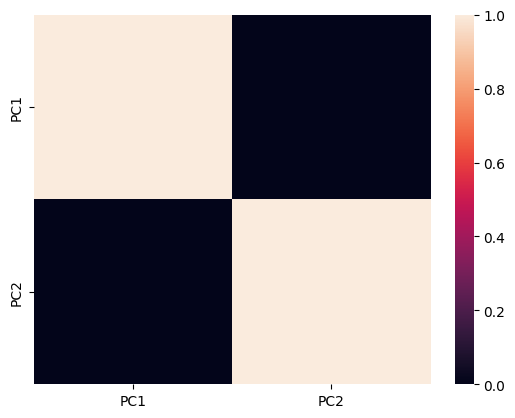

In [70]:
# Co-relation between features after PCA
sns.heatmap(pca_data.corr())

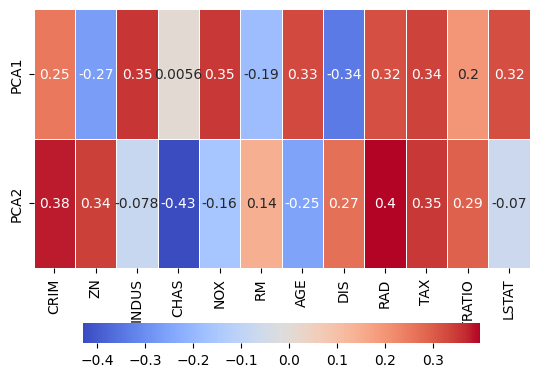

In [71]:
# Make-up of each PCA
fig, ax = plt.subplots()

ax = sns.heatmap(
    pca.components_,
    cmap = "coolwarm",
    yticklabels=[f"PCA{x}" for x in range(1,pca.n_components_+1)],
    xticklabels = list(df_x.columns),
    annot=True,
    linewidths=.5,
    cbar_kws={"shrink":.8, "orientation": 'horizontal'}
)
#ax.set_aspect("equal")
plt.show()

In [72]:
# What does this actually do for the PCA?
# Split the data
df_scaled.reset_index(drop=True)
df_y.reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(df_scaled,df_y,test_size=0.2, random_state=123)

# Create, Train, Fit, Model
model = GradientBoostAll(n_estimators=40, max_depth=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Print Model Metrics
print("MSE:", my_mse(y_test, predictions))
print("MAE:", my_mae(y_test, predictions))
print("R2:", my_r2(y_test, predictions))

MSE: 5.7591316452282975
MAE: 1.7759018830529032
R2: 0.8521063087555032


# Cross Validation Section

In [61]:
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [1, 2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.2, 0.5]
}

# Takes in dictionary of parameters to explore
def grid_search(X_train, y_train, X_test, y_test, param_grid):
    # Track lowest MSE seeen so far, set to infinity initially so every value is lower
    # Params stores best paramaters found through best score
    best_score = float('inf')
    best_params = {}

    # Nested loops to iterate over every combination of estimators depth and LR
    for n_estimators in param_grid['n_estimators']:
        for max_depth in param_grid['max_depth']:
            for learning_rate in param_grid['learning_rate']:
                # Initalize and fit model with every combination of parameters
                model = GradientBoostAll(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)
                model.fit(X_train, y_train)

                # Make predictions on the test set and calculate MSE
                y_pred = model.predict(X_test)
                score = my_mse(y_test, y_pred)

                # Update best_score and best_params if current model is better
                if score < best_score:
                    best_score = score
                    best_params = {'n_estimators': n_estimators, 'max_depth': max_depth, 'learning_rate': learning_rate}

    return best_params, best_score


best_params, best_score = grid_search(X_train, y_train, X_test, y_test, param_grid)

print("Best Parameters:", best_params)
print("Best MSE Score:", best_score)

Best Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2}
Best MSE Score: 4.298476257353344


In [62]:
#Upload data in dataframe
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', sep = '\s+', header = None, names = column_names) 
df.head()

# Remove Outliers
df = outlier_removal(df, "MEDV")
print(df.info())
df.reset_index(drop=True)
# random stuff
# Split into X and y
df_x = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
df_y = df['MEDV']
df_x.reset_index(drop=True)
df_y.reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2, random_state=123)

<class 'pandas.core.frame.DataFrame'>
Index: 466 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     466 non-null    float64
 1   ZN       466 non-null    float64
 2   INDUS    466 non-null    float64
 3   CHAS     466 non-null    int64  
 4   NOX      466 non-null    float64
 5   RM       466 non-null    float64
 6   AGE      466 non-null    float64
 7   DIS      466 non-null    float64
 8   RAD      466 non-null    int64  
 9   TAX      466 non-null    float64
 10  PTRATIO  466 non-null    float64
 11  B        466 non-null    float64
 12  LSTAT    466 non-null    float64
 13  MEDV     466 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 54.6 KB
None


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\EmmaBland\AppData\Local\Temp\ipykernel_27360\730290161.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('housing.csv', sep = '\s+', header = None, names = column_names)


In [63]:
# K-Fold CV
def kfold_split(data: pd.DataFrame, k: int) -> list:
    """Splits the data into n amount of folds

    Args:
        data (pd.DataFrame): The data we want split into folds
        n (int): amount of folds desired
    """
    # Numpy
    data2 = data.to_numpy()
    # Calculate how many data points go into each fold
    fold_size = len(data2) // k # // gets us amount of whole numbers that can go in each, leaves off remainder
    folds = []
    index_array = np.arange(len(data2))
    np.random.shuffle(index_array)
    for i in range(k):
        test_indices = index_array[(i*fold_size):(i+1)*fold_size]
        train_indices = np.concatenate([index_array[:(i*fold_size)], index_array[((i+1)*fold_size):]])
        folds.append([train_indices, test_indices])
    return folds

test = kfold_split(X_train, 5)

def kfold_cv(X_train: pd.DataFrame, y_train: pd.DataFrame, fold_indices: list):
    """_summary_

    Args:
        X_train (pd.DataFrame): X Training Data
        y_train (pd.DataFrame): y Training Data
        fold_indices (list): the split on train-test data that the k-fold will be using
    """
    # Init variables: 
    loop_tracker = 0
    # Loop through each fold to train the model, 
    for fold in fold_indices:
        loop_tracker += 1
        X_train_fold, y_train_fold = X_train.iloc[fold[0]], y_train.iloc[fold[0]]
        X_test_fold, y_test_fold = X_train.iloc[fold[1]], y_train.iloc[fold[1]]
        # Make the new model instance
        model = GradientBoostAll(n_estimators= 100, max_depth=5)
        # Train model to fold
        model.fit(X_train_fold, y_train_fold)
        # Make predictions
        predictions = model.predict(X_test_fold)
        # Model Metrics
        print(f"Loop {loop_tracker}")
        my_performance(y_test_fold, predictions)

kfold_cv(X_train, y_train, test)


Loop 1
Mean Squared Error: 8.780815386116851
Root Mean Squared Error: 2.9632440645543947
Mean Absolute Error: 2.0824381147514384
R2 Score: 0.7466139389928041
Loop 2
Mean Squared Error: 7.596153311292546
Root Mean Squared Error: 2.7561119917907084
Mean Absolute Error: 2.1067781100252105
R2 Score: 0.7758177806578119
Loop 3
Mean Squared Error: 7.9446958234469855
Root Mean Squared Error: 2.8186336802512995
Mean Absolute Error: 2.034967580914107
R2 Score: 0.84845956910353
Loop 4
Mean Squared Error: 8.625701192672944
Root Mean Squared Error: 2.936954407659905
Mean Absolute Error: 2.0350599050274445
R2 Score: 0.8259342608207976
Loop 5
Mean Squared Error: 5.998896585124825
Root Mean Squared Error: 2.4492644988087395
Mean Absolute Error: 1.7453637149563437
R2 Score: 0.8468404915091078
